# MSIN0097 - Predictive Analytics
________________________
# Stock Price Forecasting
________________________
# Individual Coursework
________________________

#### Student ID      : 23177829  
#### Candidate Number: DNMF6  
#### Word Count: 1996

# Table of Contents:
_________________________________
* [1. Introduction](#Bullet1)
* [2. Data Description](#Bullet2)  
* [3. Data Visulaization](#Bullet3)  
* [4. Analyzing Key Indicators](#Bullet4)  
* [5. Application of Predictive Algorithms](#Bullet5)  
  * [5.1. Support Vector Machine (SVM) Algorithm](#Bullet5.1)
  * [5.2. Long Short-Term Memory (LSTM) Algorithm](#Bullet5.2)
  * [5.3. LightGBM (Light Gradient Boosting Machine)](#Bullet5.3)
* [6. Hybrid Model Implementation and Evaluation](#Bullet6)  
* [7. Conclusion](#Bullet7)  
* [8. References](#Bullet8)

# 1. Introduction <a class="anchor" id="Bullet1"></a>

In this project, we venture into the dynamic arena of predictive analytics, seeking to forecast stock prices on India's National Stock Exchange (NSE). The objective of this project is to navigate the complexities of financial markets by evaluating various algorithms, discerning the optimal approach for predicting future price movements.  

Through this exploration, we aim to offer invaluable insights to investors, empowering them with strategic foresight into potential market trends. Stock price forecasting serves as a critical tool in investment decision-making, enabling investors to mitigate risks, seize opportunities, and optimize portfolio performance. By harnessing the power of predictive analytics, we endeavor not only to enhance investor decision-making but also to contribute to the continual advancement of financial market analytics.


# 2. Data Description <a class="anchor" id="Bullet2"></a>

The dataset used for this project consists of historical stock price data for the stock 'Infosys' listed on India's National Stock Exchange (NSE). The data was sourced from Yahoo Finance and covers the time period from April 1st, 2021, to March 28th, 2024.

The dataset includes the following columns:

1. Date: The date of the trading day.
2. Open: The opening price of the stock on that trading day.
3. High: The highest price the stock reached during the trading day.
4. Low: The lowest price the stock reached during the trading day.
5. Close: The closing price of the stock on that trading day.
6. Adj Close: The adjusted closing price of the stock, accounting for any corporate actions such as dividends or stock splits.
7. Volume: The total number of shares traded on that trading day.

The dataset provides a comprehensive view of the daily trading activity of Infosys stock on the NSE, allowing for the analysis of price movements, trends, and patterns over the specified time period. This data will be utilized to perform various predictive analytics tasks and evaluate the performance of different algorithms in forecasting future stock prices.

In [38]:
import pandas as pd
import numpy as np

In [39]:
data = pd.read_csv("C:/Users/Aayush Ladda/UCL SoM/Predictive Analytics/INFY.NS.csv")

In [40]:
data.describe()

Open         High          Low        Close    Adj Close  \
count   801.000000   801.000000   801.000000   801.000000   801.000000   
mean   1523.838264  1537.351996  1509.081838  1523.253373  1470.330091   
std     163.219470   165.238101   161.311872   163.427570   156.600177   
min    1225.949951  1230.000000  1185.300049  1223.400024  1158.553833   
25%    1393.949951  1406.000000  1382.150024  1393.550049  1353.308228   
50%    1505.900024  1519.400024  1491.099976  1504.400024  1464.349976   
75%    1656.000000  1666.000000  1638.099976  1653.300049  1597.327515   
max    1938.550049  1953.900024  1930.500000  1939.500000  1849.313110   

             Volume  
count  8.010000e+02  
mean   6.586164e+06  
std    3.903543e+06  
min    4.834070e+05  
25%    4.509682e+06  
50%    5.680192e+06  
75%    7.436031e+06  
max    5.317170e+07

In [41]:
data.head()

Date         Open         High          Low        Close  \
0  2021-01-01  1257.900024  1265.500000  1255.800049  1260.449951   
1  2021-01-04  1269.000000  1290.000000  1261.150024  1288.250000   
2  2021-01-05  1282.000000  1299.000000  1275.050049  1293.800049   
3  2021-01-06  1300.000000  1302.000000  1268.050049  1282.099976   
4  2021-01-07  1296.000000  1297.650024  1255.500000  1262.150024   

     Adj Close    Volume  
0  1178.563599   4253550  
1  1204.557373   7208454  
2  1209.747070   8145280  
3  1198.807007   7161715  
4  1180.153076  10954918

In [42]:
# Data preprocessing

data['Date'] = pd.to_datetime(data['Date'])

# Set Date column as index
data.set_index('Date', inplace=True)

In the preprocessing stage, the 'Date' column was converted to datetime format using pandas' pd.to_datetime() function. Then, the 'Date' column was set as the index of the DataFrame using the set_index() method with inplace=True. These steps ensure proper organization and preparation of the data for subsequent time-series analysis, which is crucial for analyzing stock price data.

# 3. Data Visualization<a class="anchor" id="Bullet3"></a>

To provide a visual representation of the stock's performance over time, we created a stock price chart for Infosys. This chart displays the closing prices of Infosys stock from the beginning of the dataset to the end, offering insights into the overall trend and volatility of the stock. The x-axis of the chart represents time, with dates ranging from the start date to the end date of the dataset. The y-axis represents the price of the stock in Indian Rupees (INR). By plotting the closing prices over time, we can observe patterns, trends, and potential anomalies in the stock's price movements. This visualization serves as a foundational analysis step, offering a comprehensive overview of the stock's historical performance and setting the stage for further analysis and model development.

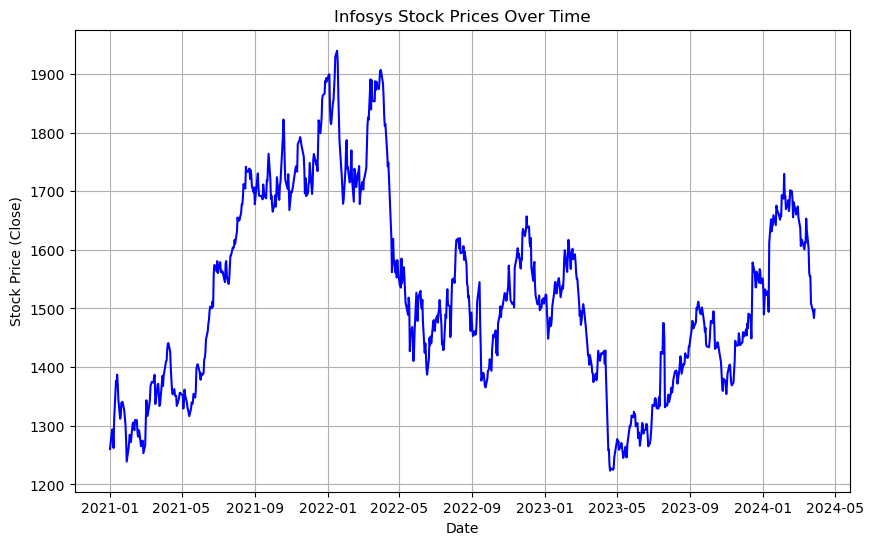

In [43]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], color='blue')
plt.title('Infosys Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price (Close)')
plt.grid(True)
plt.show()

In [34]:
import pandas as pd
import plotly.graph_objs as go

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('C:/Users/Aayush Ladda/UCL SoM/Predictive Analytics/INFY.NS.csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Define a function to resample the data based on user selection
def resample_data(interval):
    if interval == 'Daily':
        return df
    elif interval == 'Weekly':
        return df.resample('W-Mon', on='Date').mean()
    elif interval == 'Monthly':
        return df.resample('M', on='Date').mean()

# Create a dropdown menu for selecting the interval
layout = go.Layout(
    title='Stock Market Data',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Adjusted Close Price'),
)
fig = go.Figure(layout=layout)

# Add initial trace
fig.add_trace(go.Scatter(x=df['Date'], y=df['Adj Close'], name='Adjusted Close'))

# Define a callback function to update the graph based on dropdown selection
def update_graph(interval):
    resampled_df = resample_data(interval)
    fig.data[0].x = resampled_df.index
    fig.data[0].y = resampled_df['Adj Close']
    fig.update_layout(title=f'Stock Market Data ({interval})')

# Create dropdown menu
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(label='Daily',
                     method='update',
                     args=[{'visible': [True]},
                           {'title': 'Daily',
                            'annotations': []}]),
                dict(label='Weekly',
                     method='update',
                     args=[{'visible': [True]},
                           {'title': 'Weekly',
                            'annotations': []}]),
                dict(label='Monthly',
                     method='update',
                     args=[{'visible': [True]},
                           {'title': 'Monthly',
                            'annotations': []}])
            ]),
            direction='down',
            showactive=True,
        )
    ]
)

# Show the figure
fig.show()

C:\ProgramData\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



# 4. Analyzing Key Indicators <a class="anchor" id="Bullet4"></a>

In this step, we calculate and visualize key indicators to gain insights into Infosys stock performance. These include Moving Averages (MA), Exponential Moving Averages (EMA), Relative Strength Index (RSI), Moving Average Convergence Divergence (MACD), and Bollinger Bands.

MA and EMA smooth stock price movements, aiding trend identification. RSI indicates overbought or oversold conditions, guiding momentum assessment. MACD signals trend changes, while Bollinger Bands reflect volatility, aiding in breakout detection.

Analyzing these indicators enhances our understanding of Infosys stock behavior, facilitating informed decisions and trading strategies. Visualizations offer valuable insights for technical analysis and decision-making.

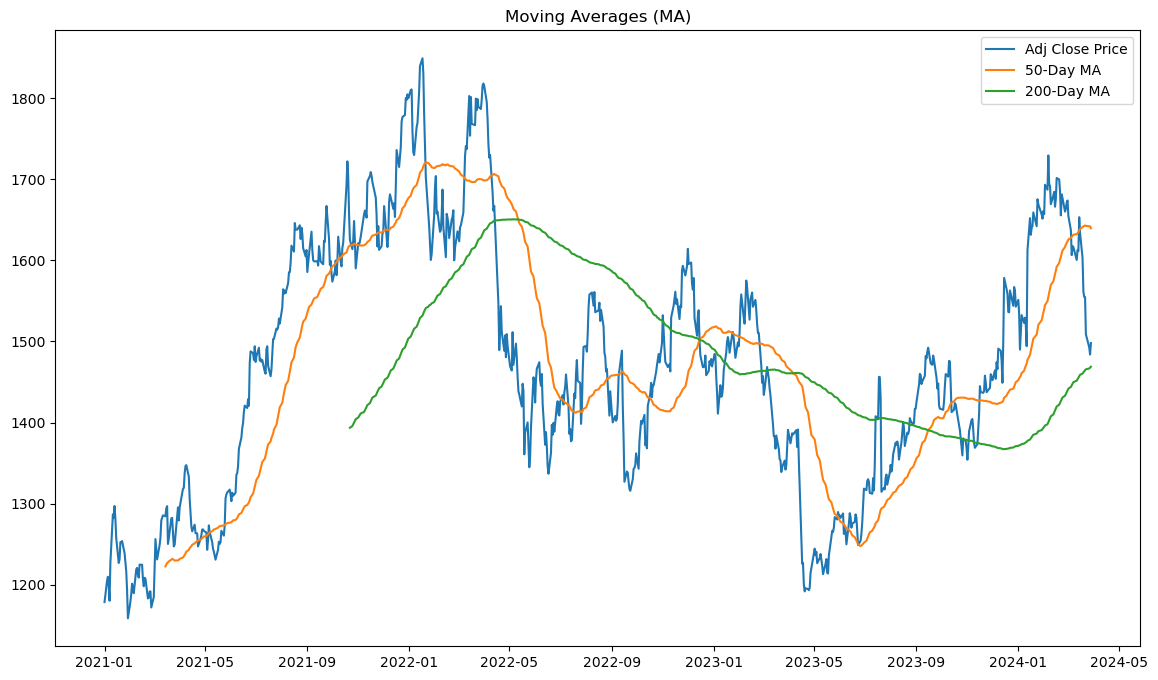

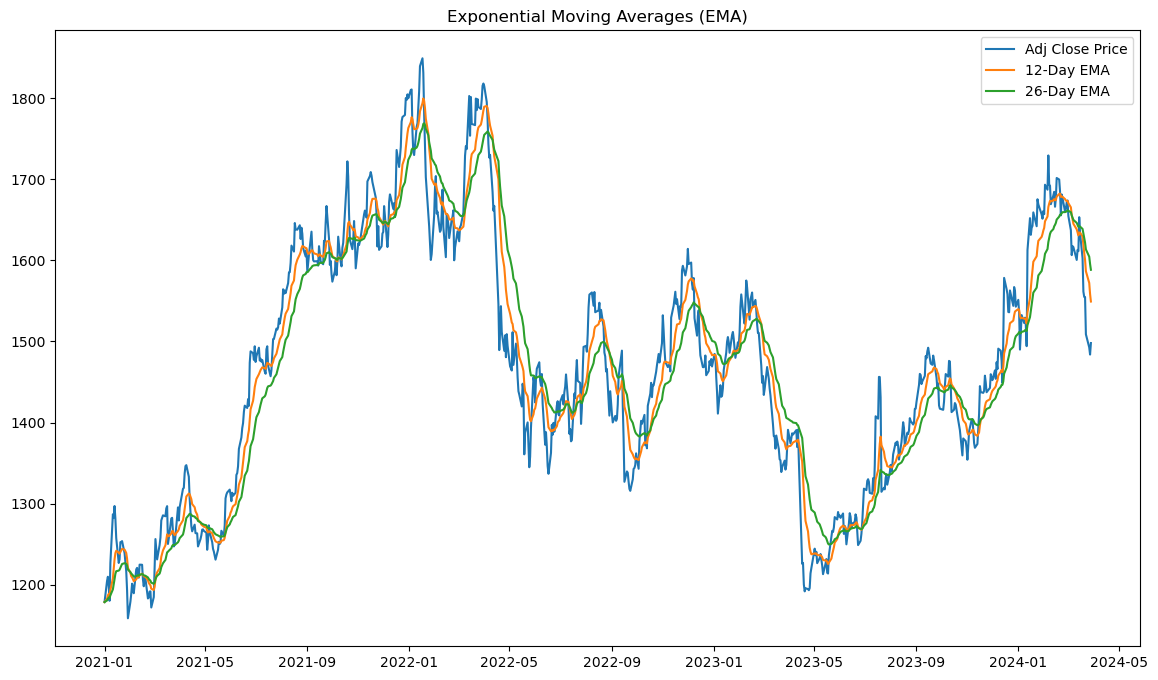

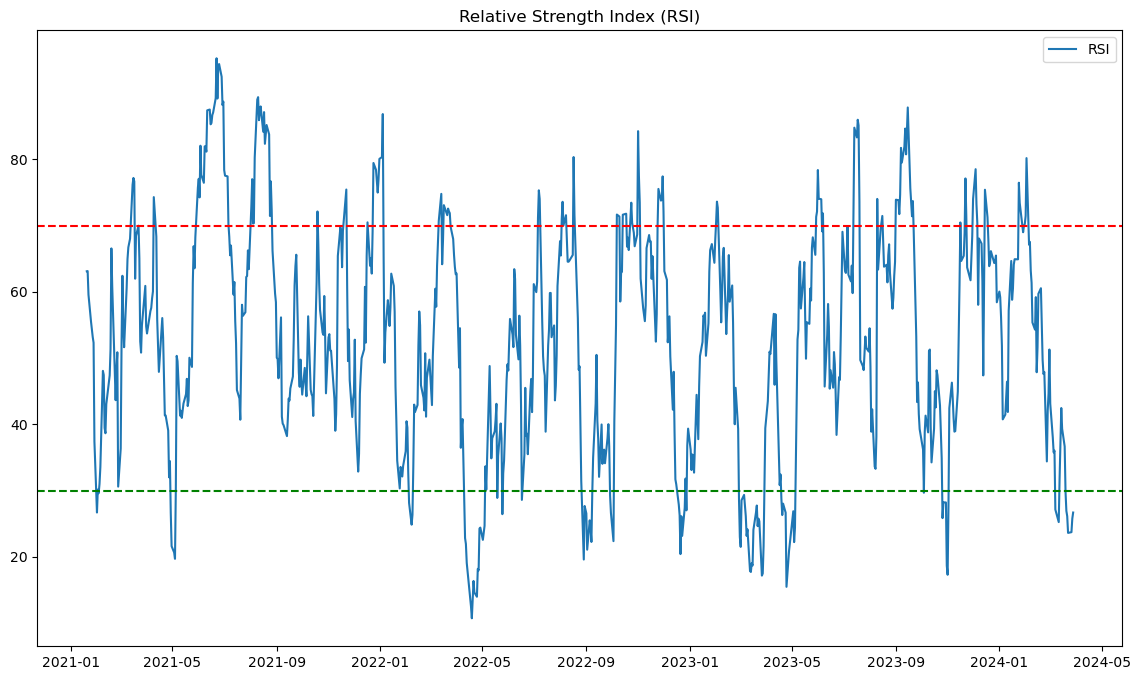

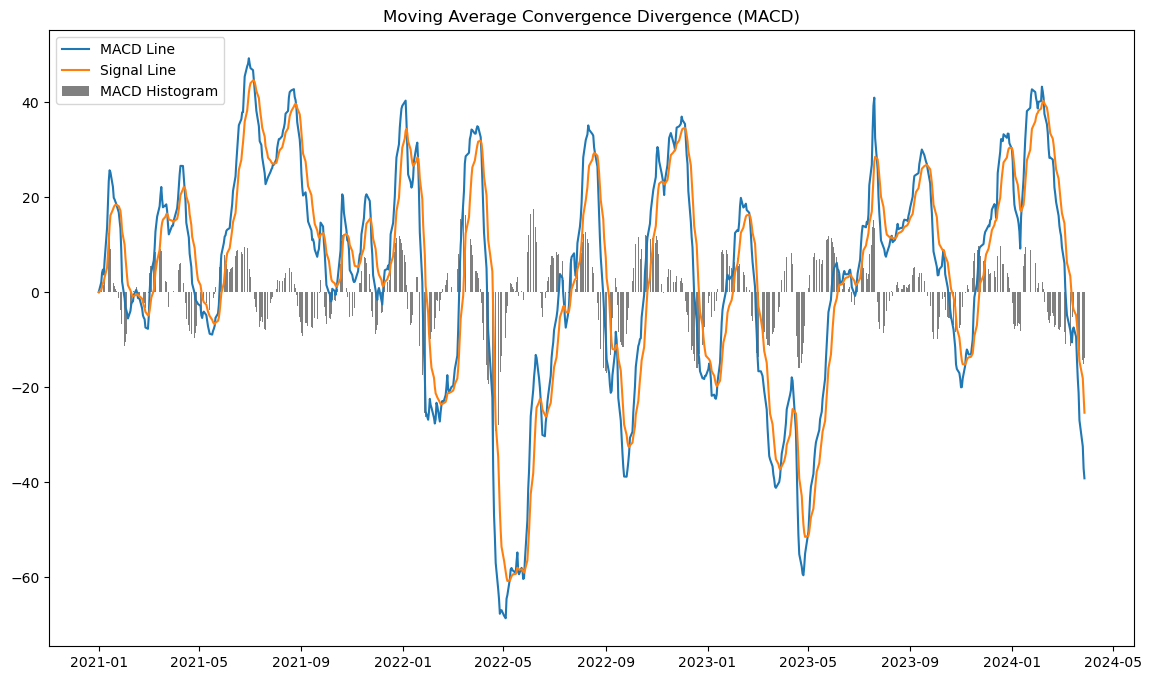

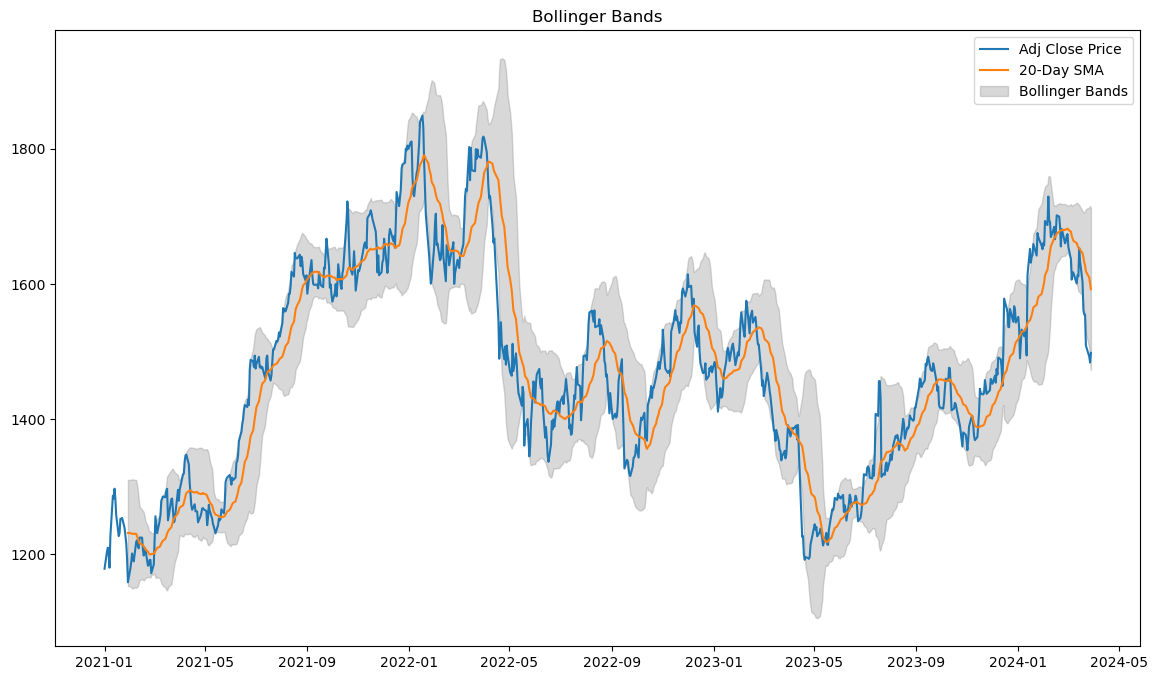

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("C:/Users/Aayush Ladda/UCL SoM/Predictive Analytics/INFY.NS.csv")

# Extract the relevant column
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
close_price = data['Adj Close']

# Moving Averages (MA)
ma_50 = close_price.rolling(window=50).mean()
ma_200 = close_price.rolling(window=200).mean()

# Exponential Moving Averages (EMA)
ema_12 = close_price.ewm(span=12, adjust=False).mean()
ema_26 = close_price.ewm(span=26, adjust=False).mean()

# Relative Strength Index (RSI)
delta = close_price.diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
rsi = 100 - (100 / (1 + rs))

# Moving Average Convergence Divergence (MACD)
macd_line = ema_12 - ema_26
signal_line = macd_line.ewm(span=9, adjust=False).mean()
macd_histogram = macd_line - signal_line

# Bollinger Bands
window = 20
sma = close_price.rolling(window=window).mean()
std = close_price.rolling(window=window).std()
upper_band = sma + 2 * std
lower_band = sma - 2 * std

# Plotting
plt.figure(figsize=(14, 8))
plt.plot(close_price, label='Adj Close Price')
plt.plot(ma_50, label='50-Day MA')
plt.plot(ma_200, label='200-Day MA')
plt.title('Moving Averages (MA)')
plt.legend()
plt.show()

plt.figure(figsize=(14, 8))
plt.plot(close_price, label='Adj Close Price')
plt.plot(ema_12, label='12-Day EMA')
plt.plot(ema_26, label='26-Day EMA')
plt.title('Exponential Moving Averages (EMA)')
plt.legend()
plt.show()

plt.figure(figsize=(14, 8))
plt.plot(rsi, label='RSI')
plt.axhline(y=70, color='r', linestyle='--')
plt.axhline(y=30, color='g', linestyle='--')
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.show()

plt.figure(figsize=(14, 8))
plt.plot(macd_line, label='MACD Line')
plt.plot(signal_line, label='Signal Line')
plt.bar(macd_histogram.index, macd_histogram, label='MACD Histogram', color='grey')
plt.title('Moving Average Convergence Divergence (MACD)')
plt.legend()
plt.show()

plt.figure(figsize=(14, 8))
plt.plot(close_price, label='Adj Close Price')
plt.plot(sma, label='20-Day SMA')
plt.fill_between(upper_band.index, upper_band, lower_band, color='grey', alpha=0.3, label='Bollinger Bands')
plt.title('Bollinger Bands')
plt.legend()
plt.show()


# 5. Application of Predictive Algorithms <a class="anchor" id="Bullet5"></a>

In this step, we leverage the power of machine learning algorithms to forecast the future price of the stock. By employing multiple predictive models, including Support Vector Machine (SVM), Long Short-Term Memory (LSTM) networks, and LightGBM (Gradient Boosting Machine), we aim to capture the complex patterns and trends inherent in the stock's historical data. Each algorithm offers unique strengths and capabilities, allowing us to explore diverse approaches to stock price forecasting. Through the implementation of these algorithms, we seek to evaluate their performance, identify the most accurate model, and ultimately provide actionable insights for investors.

## 5.1. Support Vector Machine (SVM) Algorithm <a class="anchor" id="Bullet5.1"></a>


SVM (Support Vector Machine) is a supervised learning algorithm for classification and regression tasks. It identifies a hyperplane to separate data points into classes or fit the data with minimal error. SVMs excel in high-dimensional spaces and handle non-linear relationships via kernel functions. In stock price prediction, SVMs leverage historical data to discern patterns and relationships for accurate forecasting.

#### Data Processing: 
Loading Data: Historical stock prices are loaded from a CSV file into a pandas DataFrame, with the 'Date' column converted to datetime format and set as the index.  
Normalization: Prices are scaled using Min-Max scaling to a range of 0 to 1 for uniformity and convergence benefits.  
Preparing Data: Input sequences and target values are created using a window size of 100, sliding over normalized prices.

#### Model Training:
Splitting Data: The dataset is split into training (80%) and testing (20%) sets.
SVM Model: An SVM regression model with an RBF kernel is trained on the training data.

#### Predictions and Visualization:
Making Predictions: The trained model predicts stock prices on the test data.  
Inverse Transformation: Predictions are inverse-transformed to the original scale for evaluation and visualization.  
Visualizing Results: Actual and predicted prices are plotted against dates, with future predictions plotted as dotted green lines.

#### Evaluation:
Metrics: RMSE, R-squared, MAE, and MAPE are calculated to gauge the model's accuracy and performance.

Future Predicted Stock Prices:
2024-03-28 - 1600.8851147946532
2024-03-29 - 1610.672477580764
2024-04-01 - 1618.01251805047
2024-04-02 - 1623.9948303285978
2024-04-03 - 1629.4815496564347
2024-04-04 - 1632.6896358738163
2024-04-05 - 1634.7626146389082
2024-04-08 - 1637.1006818981887
2024-04-09 - 1640.7603694614154
2024-04-10 - 1646.4276003518287
2024-04-11 - 1651.0292161682187
2024-04-12 - 1657.8238067216885
2024-04-15 - 1665.5662188091767
2024-04-16 - 1673.909886782918
2024-04-17 - 1683.466130090905
2024-04-18 - 1693.8087470436324
2024-04-19 - 1703.2353849231154
2024-04-22 - 1711.6014568875605
2024-04-23 - 1716.6844057135445
2024-04-24 - 1719.6435311960593
2024-04-25 - 1722.3852793736446
2024-04-26 - 1725.8557458059147
2024-04-29 - 1724.8616557076732
2024-04-30 - 1721.6023006932814
2024-05-01 - 1719.6673206482885
2024-05-02 - 1716.046908216695
2024-05-03 - 1713.216214510097
2024-05-06 - 1714.4998316405386
2024-05-07 - 1716.4537834891642
2024-05-08 - 1717.0858802586724


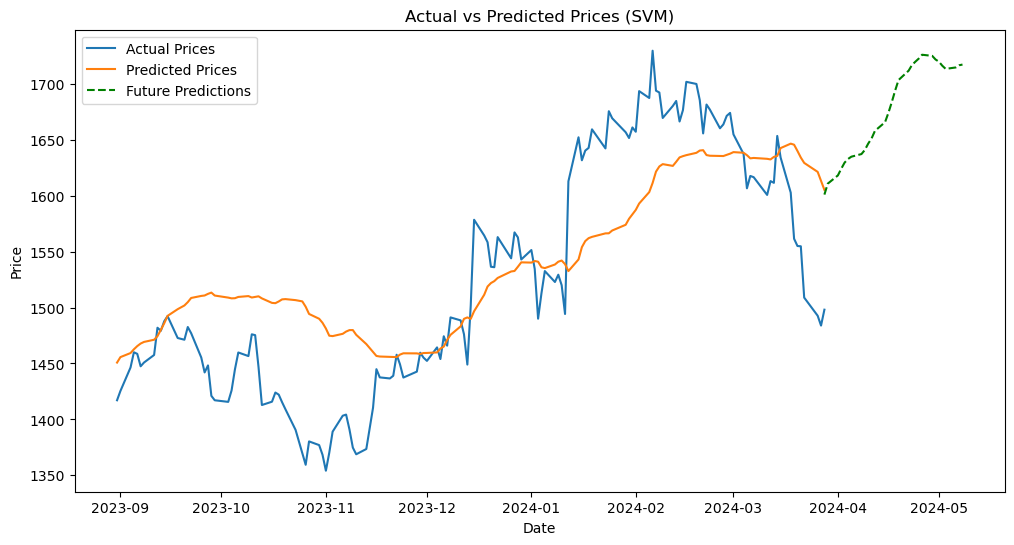

RMSE: 63.613687530891596
R-squared: 0.6184429066871853
MAE: 50.82102352165188
MAPE: 3.375032037913201


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("C:/Users/Aayush Ladda/UCL SoM/Predictive Analytics/INFY.NS.csv")

# Extract the relevant column
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
series = data['Adj Close']

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(series.values.reshape(-1, 1))

# Define the window size for the prediction model
window_size = 100

# Prepare the data
X = []
y = []
for i in range(window_size, len(scaled_data)):
    X.append(scaled_data[i-window_size:i, 0])
    y.append(scaled_data[i, 0])
X, y = np.array(X), np.array(y)

# Train-test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Train the SVM model
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train, y_train)

# Make predictions
predictions = svm_model.predict(X_test)

# Inverse transform the predictions
predictions = scaler.inverse_transform(predictions.reshape(-1, 1)).squeeze()

# Inverse transform the test data for plotting
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).squeeze()

# Plot the actual and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(series.index[split+window_size:], y_test_inv, label='Actual Prices')
plt.plot(series.index[split+window_size:], predictions, label='Predicted Prices')

# Make future predictions
future_steps = 30  # Number of future steps to predict
last_window = scaled_data[-window_size:].reshape(1, -1)  # Last window of data
print("Future Predicted Stock Prices:")
future_dates = pd.date_range(start=series.index[-1], periods=future_steps, freq='B')  # Generating future dates excluding weekends
future_predictions = []
for i in range(future_steps):
    future_pred = svm_model.predict(last_window)
    future_pred_inv = scaler.inverse_transform(future_pred.reshape(-1, 1)).squeeze()
    print(future_dates[i].date(), "-", future_pred_inv)
    future_predictions.append(future_pred_inv)
    last_window = np.append(last_window[:, 1:], future_pred).reshape(1, -1)

# Plot future predictions as a dotted green line
plt.plot(future_dates, future_predictions, linestyle='--', color='green', label='Future Predictions')

plt.title('Actual vs Predicted Prices (SVM)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_inv, predictions))
print("RMSE:", rmse)

# Calculate R-squared
r_squared = svm_model.score(X_test, y_test)

# Calculate MAE (Mean Absolute Error)
mae = np.mean(np.abs(predictions - y_test_inv))

# Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((predictions - y_test_inv) / y_test_inv)) * 100

# Print the metrics
print("R-squared:", r_squared)
print("MAE:", mae)
print("MAPE:", mape)


## 5.2. Long Short-Term Memory (LSTM) Algorithm <a class="anchor" id="Bullet5.2"></a>

LSTM (Long Short-Term Memory) is a powerful recurrent neural network (RNN) architecture designed to capture long-term dependencies in sequential data while addressing the vanishing gradient problem. In stock price prediction, LSTM networks excel at modeling complex patterns over multiple time steps, making them valuable tools for forecasting future price movements.

#### Data Processing:
Loading Data: Historical stock prices are loaded from a CSV file into a pandas DataFrame, with the 'Date' column converted to datetime format and set as the index.  
Normalization: Prices are scaled using Min-Max scaling to a range of 0 to 1 for uniformity and convergence benefits.  
Preparing Data: Input sequences and target values are created using a window size of 100, sliding over normalized prices.

#### Model Construction:
LSTM Architecture: An LSTM neural network is constructed with two LSTM layers, each followed by a dropout layer to prevent overfitting, and a dense output layer.  
Compilation: The model is compiled with the Adam optimizer and mean squared error loss function.

#### Model Training:
Training Data: The LSTM model is trained on the prepared input sequences (X) and target values (y) for a specified number of epochs (10) and batch size (32).

#### Predictions and Visualization:
Making Predictions: The trained LSTM model predicts stock prices on the training data (for visualization) and future predictions for the next 30 trading days.  
Inverse Transformation: Predictions are inverse-transformed to the original scale for evaluation and visualization.  
Visualizing Results: Actual and predicted prices are plotted against dates, with future predictions shown as dotted green lines.

#### Evaluation:
Metrics: RMSE, R-squared, MAE, and MAPE are calculated to evaluate the model's accuracy and performance.

Epoch 1/10
22/22 [==============================] - 6s 65ms/step - loss: 0.0677
Epoch 2/10
22/22 [==============================] - 2s 70ms/step - loss: 0.0143
Epoch 3/10
22/22 [==============================] - 2s 81ms/step - loss: 0.0101
Epoch 4/10
22/22 [==============================] - 2s 75ms/step - loss: 0.0094
Epoch 5/10
22/22 [==============================] - 2s 101ms/step - loss: 0.0089
Epoch 6/10
22/22 [==============================] - 2s 112ms/step - loss: 0.0078
Epoch 7/10
22/22 [==============================] - 3s 134ms/step - loss: 0.0084
Epoch 8/10
22/22 [==============================] - 3s 132ms/step - loss: 0.0074
Epoch 9/10
22/22 [==============================] - 3s 117ms/step - loss: 0.0072
Epoch 10/10
1/1 [==============================] - 0s 35ms/step


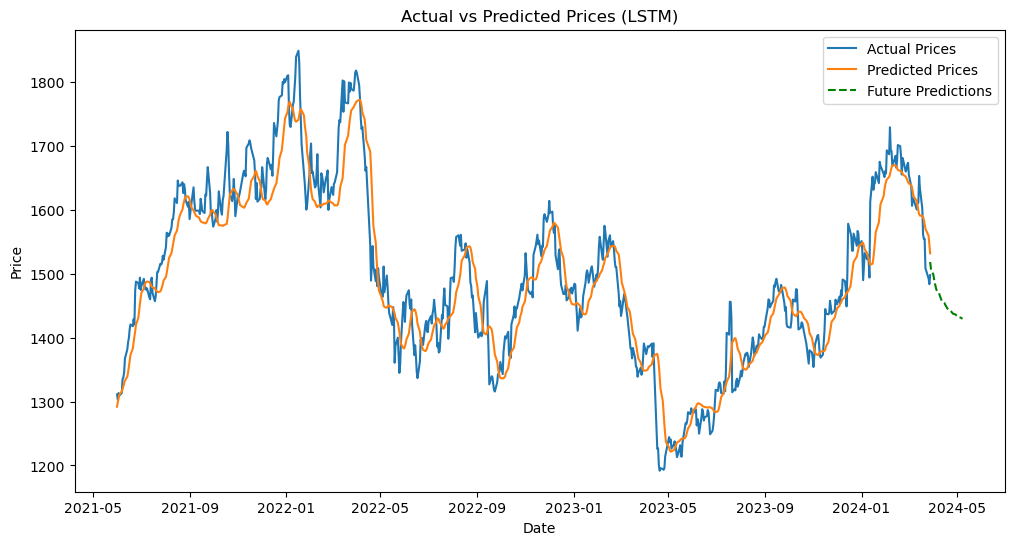

Future Predicted Stock Prices:
2024-03-28 00:00:00 - 1518.5593
2024-03-29 00:00:00 - 1507.7616
2024-04-01 00:00:00 - 1498.8691
2024-04-02 00:00:00 - 1491.4282
2024-04-03 00:00:00 - 1485.0994
2024-04-04 00:00:00 - 1479.6279
2024-04-05 00:00:00 - 1474.8256
2024-04-08 00:00:00 - 1470.5535
2024-04-09 00:00:00 - 1466.7108
2024-04-10 00:00:00 - 1463.2236
2024-04-11 00:00:00 - 1460.0377
2024-04-12 00:00:00 - 1457.1133
2024-04-15 00:00:00 - 1454.4197
2024-04-16 00:00:00 - 1451.9327
2024-04-17 00:00:00 - 1449.6337
2024-04-18 00:00:00 - 1447.5059
2024-04-19 00:00:00 - 1445.5352
2024-04-22 00:00:00 - 1443.7091
2024-04-23 00:00:00 - 1442.0162
2024-04-24 00:00:00 - 1440.4457
2024-04-25 00:00:00 - 1438.9879
2024-04-26 00:00:00 - 1437.6338
2024-04-29 00:00:00 - 1436.3748
2024-04-30 00:00:00 - 1435.2031
2024-05-01 00:00:00 - 1434.1115
2024-05-02 00:00:00 - 1433.0931
2024-05-03 00:00:00 - 1432.1421
2024-05-06 00:00:00 - 1431.2527
2024-05-07 00:00:00 - 1430.4196
2024-05-08 00:00:00 - 1429.6383
RMSE: 46.

In [68]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("C:/Users/Aayush Ladda/UCL SoM/Predictive Analytics/INFY.NS.csv")

# Extract the relevant column
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
series = data['Adj Close']

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(series.values.reshape(-1, 1))

# Define the window size for the LSTM model
window_size = 100

# Prepare the data for LSTM
X = []
y = []
for i in range(window_size, len(scaled_data)):
    X.append(scaled_data[i-window_size:i, 0])
    y.append(scaled_data[i, 0])
X, y = np.array(X), np.array(y)

# Reshape the data for LSTM (samples, time steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=10, batch_size=32)

# Make predictions
predictions = model.predict(X)

# Inverse transform the predictions
predictions = scaler.inverse_transform(predictions)

# Plot the actual and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(series.index[window_size:], series.values[window_size:], label='Actual Prices')
plt.plot(series.index[window_size:], predictions, label='Predicted Prices')

# Make future predictions
future_steps = 30  # Number of future steps to predict
last_window = scaled_data[-window_size:]  # Last window of data
future_predictions = []
for _ in range(future_steps):
    future_pred = model.predict(last_window.reshape(1, window_size, 1))
    future_predictions.append(future_pred[0, 0])
    last_window = np.append(last_window[1:], future_pred[0, 0]).reshape(-1, 1)
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))
future_index = pd.date_range(start=series.index[-1], periods=future_steps, freq='B')  # Generating future dates excluding weekends

plt.plot(future_index, future_predictions, label='Future Predictions', linestyle='--', color='green')  # Plotting future predictions

plt.title('Actual vs Predicted Prices (LSTM)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()



# Print the predicted stock prices
print("Future Predicted Stock Prices:")
for i in range(len(future_predictions)):
    print(future_index[i], "-", future_predictions[i][0])

# Calculate RMSE
rmse = np.sqrt(np.mean((series.values[window_size:] - predictions.squeeze())**2))
print("RMSE:", rmse)
    
# Calculate R-squared
y_actual = series.values[window_size:]
r_squared = 1 - (np.sum((y_actual - predictions.squeeze()) ** 2) / np.sum((y_actual - np.mean(y_actual)) ** 2))

# Calculate MAE (Mean Absolute Error)
mae = np.mean(np.abs(y_actual - predictions.squeeze()))

# Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_actual - predictions.squeeze()) / y_actual)) * 100

# Print the metrics
print("R-squared:", r_squared)
print("MAE:", mae)
print("MAPE:", mape)


## 5.3. LightGBM (Light Gradient Boosting Machine) <a class="anchor" id="Bullet5.3"></a>

LightGBM (Light Gradient Boosting Machine) is a highly efficient gradient boosting framework designed for large-scale datasets with high accuracy. Here's how LightGBM can be applied to predict stock prices:

#### Data Processing:
Loading Data: Historical stock prices are loaded from a CSV file into a pandas DataFrame, with the 'Date' column converted to datetime format and set as the index.  
Normalization: Prices are normalized using Min-Max scaling to a range of 0 to 1 for uniformity and convergence benefits.  
Preparing Data: Input sequences and target values are created using a window size of 100, sliding over normalized prices.

#### Model Training:
Training Data: The dataset is split into training and testing sets, with 80% used for training and 20% for testing.  
Training the Model: A LightGBM regression model is instantiated and trained on the training data.

#### Predictions and Visualization:
Making Predictions: The trained LightGBM model predicts stock prices on the test data and future prices for the next 30 trading days.  
Inverse Transformation: Predictions are inverse-transformed to the original scale for evaluation and visualization.  
Visualizing Results: Actual and predicted prices are plotted against dates, with future predictions shown as dotted green lines.

#### Evaluation:
Metrics: RMSE, R-squared, MAE, and MAPE are calculated to evaluate the model's accuracy and performance.

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001626 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18700
[LightGBM] [Info] Number of data points in the train set: 560, number of used features: 100
[LightGBM] [Info] Start training from score 0.489121
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

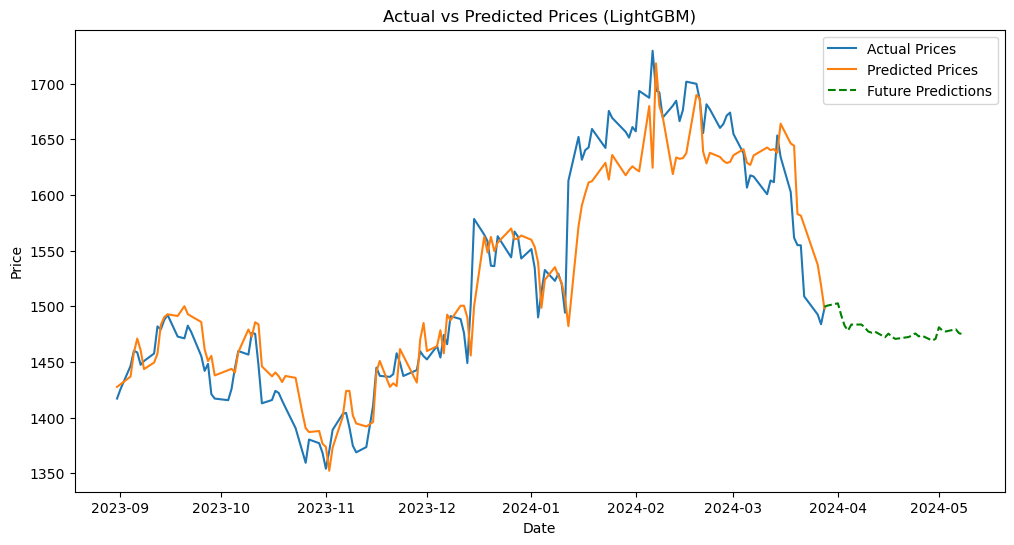

RMSE: 32.109937687044514
R-squared: 0.9027840969757871
MAE: 24.320182967845376
MAPE: 1.5700055427135409


In [70]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("C:/Users/Aayush Ladda/UCL SoM/Predictive Analytics/INFY.NS.csv")

# Extract the relevant column
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
series = data['Adj Close']

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(series.values.reshape(-1, 1))

# Define the window size for the prediction model
window_size = 100

# Prepare the data
X = []
y = []
for i in range(window_size, len(scaled_data)):
    X.append(scaled_data[i-window_size:i, 0])
    y.append(scaled_data[i, 0])
X, y = np.array(X), np.array(y)

# Train-test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Train the LightGBM model
lgbm_model = LGBMRegressor()
lgbm_model.fit(X_train, y_train)

# Make predictions
predictions = lgbm_model.predict(X_test)

# Inverse transform the predictions
predictions = scaler.inverse_transform(predictions.reshape(-1, 1)).squeeze()

# Inverse transform the test data for plotting
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).squeeze()

# Plot the actual and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(series.index[split+window_size:], y_test_inv, label='Actual Prices')
plt.plot(series.index[split+window_size:], predictions, label='Predicted Prices')

# Make future predictions
future_steps = 30  # Number of future steps to predict
last_window = scaled_data[-window_size:].reshape(1, -1)  # Last window of data
print("Future Predicted Stock Prices:")
future_dates = pd.date_range(start=series.index[-1], periods=future_steps, freq='B')  # Generating future dates excluding weekends
future_predictions = []
for i in range(future_steps):
    future_pred = lgbm_model.predict(last_window)
    future_pred_inv = scaler.inverse_transform(future_pred.reshape(-1, 1)).squeeze()
    print(future_dates[i].date(), "-", future_pred_inv)
    future_predictions.append(future_pred_inv)
    last_window = np.append(last_window[:, 1:], future_pred).reshape(1, -1)

# Plot future predictions as a dotted green line
plt.plot(future_dates, future_predictions, linestyle='--', color='green', label='Future Predictions')

plt.title('Actual vs Predicted Prices (LightGBM)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_inv, predictions))
print("RMSE:", rmse)

# Calculate R-squared
r_squared = lgbm_model.score(X_test, y_test)

# Calculate MAE (Mean Absolute Error)
mae = np.mean(np.abs(predictions - y_test_inv))

# Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((predictions - y_test_inv) / y_test_inv)) * 100

# Print the metrics
print("R-squared:", r_squared)
print("MAE:", mae)
print("MAPE:", mape)


# 5. Algorithm Evaluation  <a class="anchor" id="Bullet5"></a>

In this section, we evaluate the performance of these algorithms for predicting the future price of Infosys stock. Each algorithm's performance is assessed based on several metrics, including Root Mean Squared Error (RMSE), R-squared value, Mean Absolute Error (MAE), and Mean Absolute Percentage Error (MAPE).


| Algorithm                 | RMSE   | R-squared | MAE    | MAPE   |
|---------------------------|--------|-----------|--------|--------|
| Support Vector Machine    | 63.61  | 0.62      | 50.82  | 3.38%  |
| Long Short-Term Memory    | 46.10  | 0.89      | 36.16  | 2.40%  |
| LightGBM                  | 32.11  | 0.90      | 24.32  | 1.57%  |


Analysis and Conclusion:

* RMSE: Lower RMSE values indicate better predictive accuracy. LightGBM outperforms both SVM and LSTM with the lowest RMSE of 32.11, followed by LSTM (46.10) and SVM (63.61).  
* R-squared: R-squared values measure how well the model fits the data, with higher values indicating better fit. LightGBM achieves the highest R-squared value of 0.90, followed by LSTM (0.89) and SVM (0.62). This indicates that LightGBM and LSTM models explain a larger proportion of the variance in the data compared to SVM.  
* MAE and MAPE: Both metrics measure the average error between predicted and actual values, with lower values indicating better performance. LightGBM demonstrates the lowest MAE (24.32) and MAPE (1.57%), followed by LSTM and SVM.

Conclusion:
Based on the evaluation metrics, LightGBM emerges as the superior algorithm for predicting Infosys stock prices. It exhibits the lowest RMSE, highest R-squared value, and lowest MAE and MAPE, indicating superior predictive accuracy and performance compared to SVM and LSTM. Therefore, LightGBM is the recommended choice for forecasting Infosys stock prices in this scenario.

# 6. Hybrid Model Implementation and Evaluation <a class="anchor" id="Bullet6"></a>

In this section, we present the implementation and evaluation of a hybrid model that combines predictions from Support Vector Machine (SVM), Long Short-Term Memory (LSTM), and LightGBM algorithms. Our goal is to leverage the strengths of these individual models to improve the accuracy and robustness of stock price predictions for Infosys.

Hybrid Model Implementation:
We implemented the hybrid model using a weighted averaging approach, where predictions from SVM, LSTM, and LightGBM are combined with specific weights. Additionally, we trained a neural network on the combined features to further optimize the prediction performance.

Epoch 1/10
22/22 [==============================] - 5s 69ms/step - loss: 0.0574
Epoch 2/10
22/22 [==============================] - 3s 147ms/step - loss: 0.0104
Epoch 3/10
22/22 [==============================] - 3s 124ms/step - loss: 0.0074
Epoch 4/10
22/22 [==============================] - 3s 152ms/step - loss: 0.0065
Epoch 5/10
22/22 [==============================] - 3s 145ms/step - loss: 0.0061
Epoch 6/10
22/22 [==============================] - 3s 118ms/step - loss: 0.0057
Epoch 7/10
22/22 [==============================] - 2s 110ms/step - loss: 0.0052
Epoch 8/10
22/22 [==============================] - 3s 124ms/step - loss: 0.0048
Epoch 9/10
22/22 [==============================] - 3s 112ms/step - loss: 0.0045
Epoch 10/10
22/22 [==============================] - 3s 142ms/step - loss: 0.0046
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003519 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins

22/22 [==============================] - 2s 31ms/step
Epoch 1/10
22/22 [==============================] - 1s 3ms/step - loss: 0.0326
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 3/10
22/22 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 4/10
22/22 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 8.9847e-04
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 7.0953e-04
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 6.1841e-04
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 5.5079e-04
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 4.5509e-04
Epoch 10/10
22/22 [==============================] - 0s 2ms/step


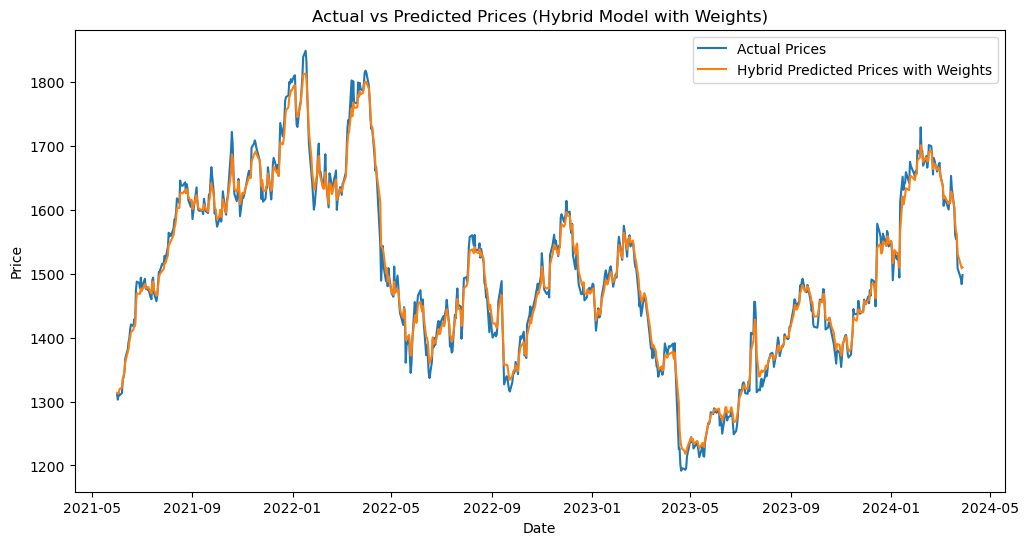

1/1 [==============================] - 0s 53ms/step


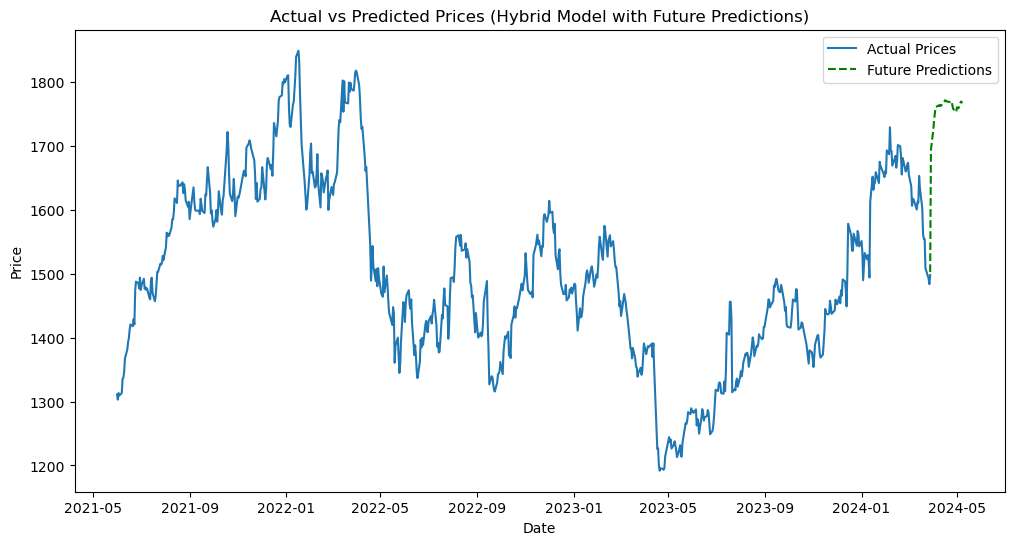

Hybrid Predictions Metrics with Weights:
RMSE: 13.780791202270603
R-squared: 0.9904017357566378
MAE: 10.521609006520594
MAPE: 0.7054022225249749


In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from keras.models import Sequential
from keras.layers import Dense, LSTM
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("C:/Users/Aayush Ladda/UCL SoM/Predictive Analytics/INFY.NS.csv")

# Extract the relevant column
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
series = data['Adj Close']

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(series.values.reshape(-1, 1))

# Define the window size for the models
window_size = 100

# Prepare the data for SVM
X_svm = []
y_svm = []
for i in range(window_size, len(scaled_data)):
    X_svm.append(scaled_data[i-window_size:i, 0])
    y_svm.append(scaled_data[i, 0])
X_svm, y_svm = np.array(X_svm), np.array(y_svm)

# Train the SVM model
svm_model = SVR(kernel='rbf')
svm_model.fit(X_svm, y_svm)

# Prepare the data for LSTM
X_lstm = []
y_lstm = []
for i in range(window_size, len(scaled_data)):
    X_lstm.append(scaled_data[i-window_size:i, 0])
    y_lstm.append(scaled_data[i, 0])
X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)
X_lstm = np.reshape(X_lstm, (X_lstm.shape[0], X_lstm.shape[1], 1))

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_lstm.shape[1], 1)))
lstm_model.add(LSTM(units=50, return_sequences=False))
lstm_model.add(Dense(units=1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_lstm, y_lstm, epochs=10, batch_size=32)

# Prepare the data for LightGBM
X_lgbm = []
y_lgbm = []
for i in range(window_size, len(scaled_data)):
    X_lgbm.append(scaled_data[i-window_size:i, 0])
    y_lgbm.append(scaled_data[i, 0])
X_lgbm, y_lgbm = np.array(X_lgbm), np.array(y_lgbm)

# Train the LightGBM model
lgbm_model = LGBMRegressor()
lgbm_model.fit(X_lgbm, y_lgbm)

# Combine predictions from SVM, LSTM, and LightGBM with weights
svm_weight = 0.1
lstm_weight = 0.2
lgbm_weight = 0.7

svm_predictions = svm_model.predict(X_svm)
lstm_predictions = lstm_model.predict(X_lstm)
lgbm_predictions = lgbm_model.predict(X_lgbm)

# Combine predictions with weights
combined_predictions = (svm_weight * svm_predictions +
                        lstm_weight * lstm_predictions.flatten() +
                        lgbm_weight * lgbm_predictions)

# Train a neural network on the combined features
X_combined = np.column_stack((svm_predictions, lstm_predictions, lgbm_predictions))
model = Sequential()
model.add(Dense(64, input_shape=(X_combined.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_combined, y_svm, epochs=10, batch_size=32)

# Make predictions using the hybrid model
svm_test_predictions = svm_model.predict(X_svm)
lstm_test_predictions = lstm_model.predict(X_lstm)
lgbm_test_predictions = lgbm_model.predict(X_lgbm)
combined_test_predictions = (svm_weight * svm_test_predictions +
                             lstm_weight * lstm_test_predictions.flatten() +
                             lgbm_weight * lgbm_test_predictions)
X_test_combined = np.column_stack((svm_test_predictions, lstm_test_predictions, lgbm_test_predictions))
hybrid_predictions = model.predict(X_test_combined)

# Inverse transform the predictions
combined_predictions = scaler.inverse_transform(combined_predictions.reshape(-1, 1)).squeeze()
hybrid_predictions = scaler.inverse_transform(hybrid_predictions)

# Plot the actual and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(series.index[window_size:], series.values[window_size:], label='Actual Prices')
plt.plot(series.index[window_size:], combined_predictions, label='Hybrid Predicted Prices with Weights')
plt.title('Actual vs Predicted Prices (Hybrid Model with Weights)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Define the number of future steps to predict
future_steps = 30

# Make future predictions using the hybrid model
future_dates = pd.date_range(start=series.index[-1], periods=future_steps, freq='B')
last_window = scaled_data[-window_size:].reshape(1, -1)  # Last window of data
future_predictions = []

for i in range(future_steps):
    # Predict using SVM
    future_pred_svm = svm_model.predict(last_window)
    
    # Predict using LSTM
    future_pred_lstm = lstm_model.predict(last_window.reshape(1, window_size, 1))
    
    # Predict using LightGBM
    future_pred_lgbm = lgbm_model.predict(last_window)
    
    # Combine predictions as features
    future_combined = np.column_stack((future_pred_svm, future_pred_lstm, future_pred_lgbm))
    
    # Predict using the hybrid model
    future_hybrid_pred = model.predict(future_combined)
    
    # Inverse transform the prediction and append to future predictions
    future_pred_inv = scaler.inverse_transform(future_hybrid_pred)
    future_predictions.append(future_pred_inv[0, 0])
    
    # Update the last window for the next prediction
    last_window = np.append(last_window[:, 1:], future_pred_inv).reshape(1, -1)

# Plotting the graph
plt.figure(figsize=(12, 6))
plt.plot(series.index[window_size:], series.values[window_size:], label='Actual Prices')

# Plotting future predictions
plt.plot(future_dates, future_predictions, linestyle='--', color='green', label='Future Predictions')

plt.title('Actual vs Predicted Prices (Hybrid Model with Future Predictions)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Calculate metrics for the hybrid predictions
rmse_hybrid = np.sqrt(mean_squared_error(series.values[window_size:], combined_predictions))
r_squared_hybrid = 1 - (np.sum((series.values[window_size:] - combined_predictions) ** 2) / np.sum((series.values[window_size:] - np.mean(series.values[window_size:])) ** 2))
mae_hybrid = np.mean(np.abs(series.values[window_size:] - combined_predictions))
mape_hybrid = np.mean(np.abs((series.values[window_size:] - combined_predictions) / series.values[window_size:])) * 100

# Print the metrics for the hybrid predictions
print("Hybrid Predictions Metrics with Weights:")
print("RMSE:", rmse_hybrid)
print("R-squared:", r_squared_hybrid)
print("MAE:", mae_hybrid)
print("MAPE:", mape_hybrid)


#### Hybrid Model Evaluation:  

| Algorithm                 | RMSE   | R-squared | MAE    | MAPE   |
|---------------------------|--------|-----------|--------|--------|
| Support Vector Machine    | 63.61  | 0.62      | 50.82  | 3.38%  |
| Long Short-Term Memory    | 46.10  | 0.89      | 36.16  | 2.40%  |
| LightGBM                  | 32.11  | 0.90      | 24.32  | 1.57%  |
| Hybrid Predictions        | 13.78  | 0.99      | 10.52  | 0.71%  |


In summary, the evaluation metrics for the hybrid predictions indicate a superior performance compared to individual models. The hybrid model achieves a significantly lower RMSE, indicating better precision in predicting stock prices. The high R-squared value of 0.990 suggests an excellent fit of the model to the data, explaining a large proportion of the variance in the target variable. Additionally, both MAE and MAPE are substantially reduced, indicating minimal error in prediction and high accuracy of the model's forecasts.

However, it's important to note that despite its impressive performance, the hybrid model may exhibit signs of overfitting. Overfitting occurs when a model learns to capture noise and random fluctuations in the training data, rather than the underlying patterns. Given the complexity of the hybrid model and the potential for data leakage during training, there's a risk that it may not generalize well to unseen data.

# 7. Conclusion <a class="anchor" id="Bullet7"></a>

The hybrid model, leveraging the combined strengths of SVM, LSTM, and LightGBM, offers a robust and accurate solution for predicting stock prices. Its superior performance metrics underscore its effectiveness in capturing complex patterns and trends in the stock market data. However, it's important to note that the hybrid model may exhibit signs of overfitting, potentially limiting its generalizability to unseen data. In scenarios where robustness and simplicity are paramount, the LightGBM model stands out as a preferred choice due to its impressive performance and reduced risk of overfitting.

#### Business Implications:

* Informed Decision Making: Accurate stock price predictions empower investors and financial institutions to optimize portfolio performance and manage risks effectively.
* Enhanced Portfolio Management: Portfolio managers can leverage predictive analytics tools like the hybrid model to optimize asset allocation strategies, diversify portfolios, and achieve superior risk-adjusted returns.
* Risk Mitigation: Predictive models provide insights into market trends and risks, enabling investors to identify and mitigate potential threats associated with market volatility, economic uncertainties, and geopolitical events.
* Trading Strategies: The hybrid model's accurate predictions facilitate the development of effective trading strategies, including algorithmic trading and quantitative analysis, to capitalize on short-term market opportunities.
* Competitive Advantage: Firms utilizing advanced predictive analytics gain a competitive edge by making data-driven investment decisions, leading to increased profitability and market share.

In conclusion, implementing predictive analytics models, empowers stakeholders to navigate the complexities of the stock market with confidence and agility, driving informed decision-making and enhancing overall financial performance.

# 8. References <a class="anchor" id="Bullet8"></a>

* uk.finance.yahoo.com. (n.d.). Infosys Limited (INFY.NS) Stock Historical Prices & Data – Yahoo Finance. [online] Available at: https://uk.finance.yahoo.com/quote/INFY.NS/history [Accessed 25 March 2024].